# Evalutaion Matirx

In [15]:
# First of all we will import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
# Now we will import the data
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

# Create a dataframe of the data
df = pd.read_csv(url)


In [5]:
# Putting an eye on the head of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Getting the desciption of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Getting the shape of data
df.shape

(768, 9)

In [8]:
# Checking if these is any null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# Filling all the zero values with the median of the columsn
columns = ['Glucose' , 'BloodPressure', 'SkinThickness', 'Insulin' , 'BMI']
for col in columns:
    df[col] = df[col].replace(0 , df[col].median())

In [10]:
# Seprating the train and test
X = df.drop('Outcome' , axis=1)
y = df['Outcome']

In [11]:
# Splitting the data into train and test
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2)

In [13]:
# Now we will train the model 
lr = LogisticRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy Score for logistic Regression is: {accuracy_score(y_test , y_pred)}")

Accuracy Score for logistic Regression is: 0.7727272727272727


C:\Users\Home\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Now we will perfrom all the evalution matrices

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7727272727272727
Precision: 0.6923076923076923
Recall: 0.6545454545454545
F1 Score: 0.6728971962616822


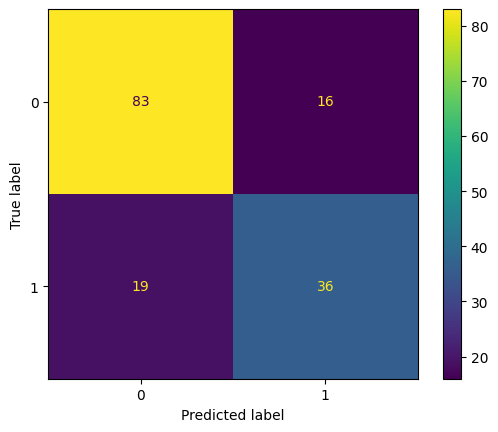

In [16]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

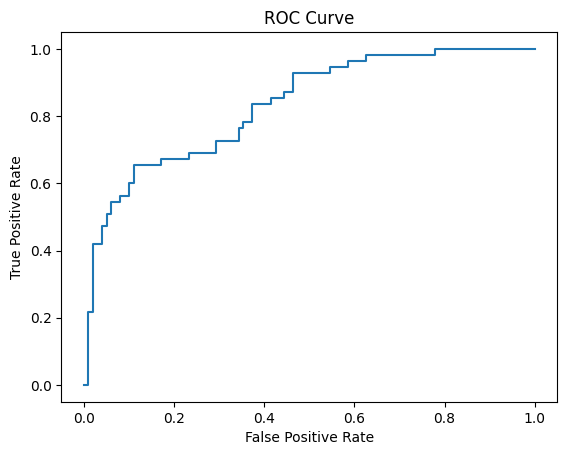

ROC-AUC Score: 0.8319559228650137


In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
